# Practical Lab 5  

### Multivariate Regression, Non-Parametric Models and Cross-Validation

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error,r2_score


#### Load dataset - Diabetes

In [58]:
# Load the Diabetes dataset
diabetes = load_diabetes(as_frame=True)

# Extract feature data (data) and target variable
X = diabetes.data
y = diabetes.target

# Convert the data and target to a DataFrame
df = pd.concat([X, y], axis=1)
df.columns = list(diabetes.feature_names) + ['target']

#### EDA exploration

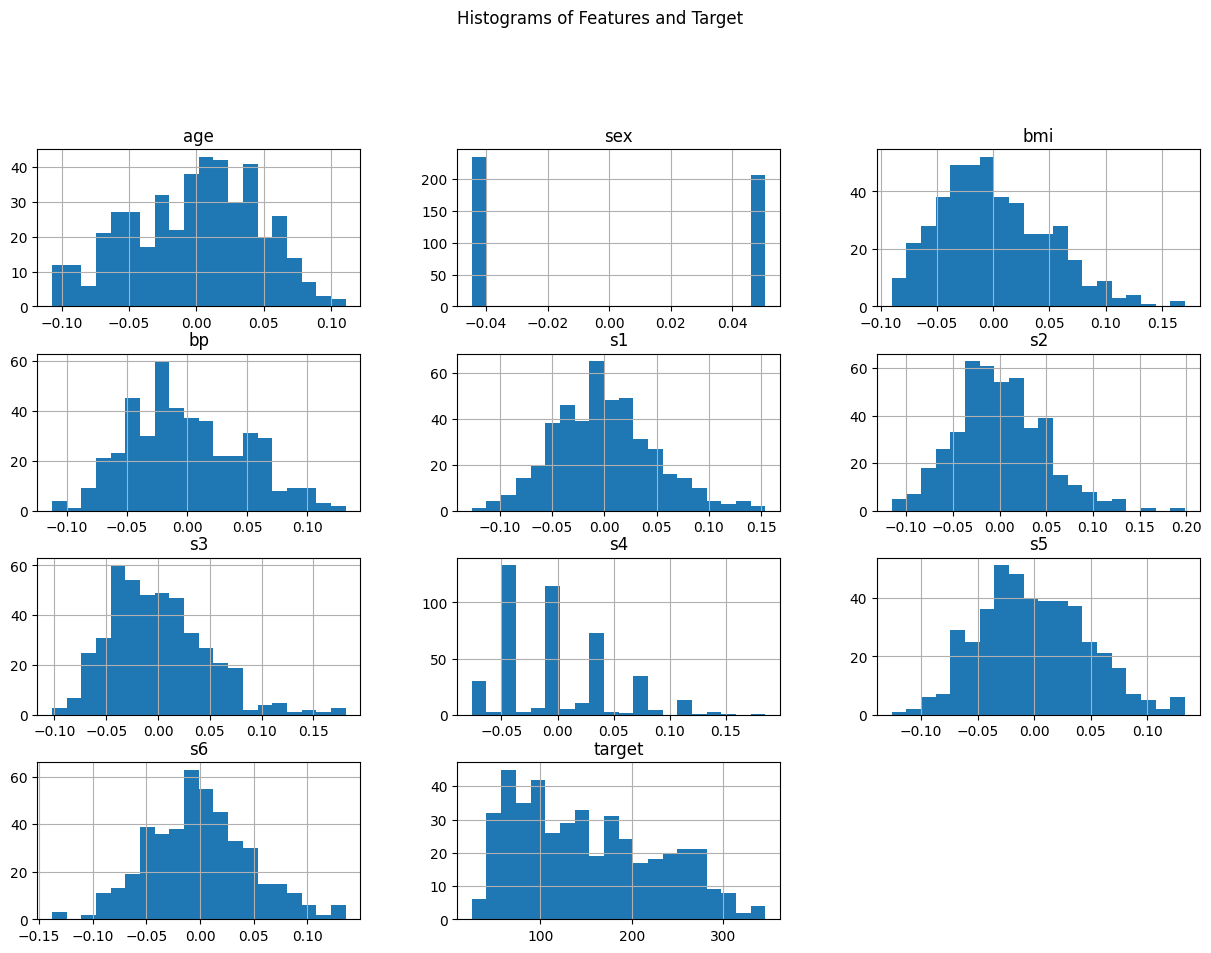

Basic Statistics:
                age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02

In [59]:
# Display basic statistics
statistics = df.describe()


# Create histograms
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Features and Target", y=1.02)

plt.show()


# Create a correlation matrix
correlation_matrix = df.corr()

# # Plot the correlation matrix as a heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Correlation Matrix")
# plt.show()

# Display insights
print("Basic Statistics:")
print(statistics)
print("\nCorrelation Matrix:")
print(correlation_matrix)

From the corelation matrix, it is seen that there is corelation between bmi and s5. So we can take those 2 features and drop all the other features.

In [60]:
X = df[['bmi', 's5']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### Perform cross-validation
Cross validation is done on on total 6 models which includes:
* Polynomial Regression Model with degree 2
* Polynomial Regression Model with degree 3
* Decision Tree with depth 3
* Decision Tree with depth 5
* KNN = 3
* KNN = 5

In [61]:
results = {}
scoring = {'r2': 'r2', 'mae': make_scorer(mean_absolute_error), 'mape': make_scorer(lambda y_true, y_pred: np.mean(np.abs((y_true - y_pred) / y_true)) * 100)}

# Polynomial Model with degree 2
model_deg2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
cv_results = cross_validate(model_deg2, X_train, y_train, cv=5, scoring=scoring)
results['Polynomial Degree 2'] = cv_results

# Polynomial Model with degree 3
model_deg3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
cv_results = cross_validate(model_deg3, X_train, y_train, cv=5, scoring=scoring)
results['Polynomial Degree 3'] = cv_results


# Decision Tree Depth 3
model_dec3 = DecisionTreeRegressor(max_depth=3)
cv_results = cross_validate(model_dec3, X_train, y_train, cv=5, scoring=scoring)
results['Decision Tree Depth 3'] = cv_results

# Decision Tree Depth 5
model_dec5 = DecisionTreeRegressor(max_depth=5)
cv_results = cross_validate(model_dec5, X_train, y_train, cv=5, scoring=scoring)
results['Decision Tree Depth 5'] = cv_results


# kNN k=3
model_knn3 = KNeighborsRegressor(n_neighbors=3)
cv_results = cross_validate(model_knn3, X_train, y_train, cv=5, scoring=scoring)
results['kNN k=3'] = cv_results

# kNN k=5
model_knn5 = KNeighborsRegressor(n_neighbors=5)
cv_results = cross_validate(model_knn5, X_train, y_train, cv=5, scoring=scoring)
results['kNN k=5'] = cv_results


#### Summary on Cross Validation Results for 6 Models

In [63]:
print("Cross-validation Results:")
results_df = pd.DataFrame.from_dict(results, orient='index')

# Calculating mean and standard deviation for each model over all 5 folds
summary_data = []
for name, result in results.items():
    summary_data.append({
        'Model': name,
        'R-Squared Mean': np.mean(result['test_r2']),
        'R-Squared Std': np.std(result['test_r2']),
        'MAE Mean': np.mean(result['test_mae']),
        'MAE Std': np.std(result['test_mae']),
        'MAPE Mean': np.mean(result['test_mape']),
        'MAPE Std': np.std(result['test_mape'])
    })

summary = pd.DataFrame(summary_data)

print(summary)

Cross-validation Results:
                   Model  R-Squared Mean  R-Squared Std   MAE Mean   MAE Std   
0    Polynomial Degree 2        0.408797       0.143873  47.956247  2.952453  \
1    Polynomial Degree 3        0.416940       0.140086  47.346562  2.549094   
2  Decision Tree Depth 3        0.346566       0.134802  50.312293  3.311127   
3  Decision Tree Depth 5        0.198983       0.186872  54.564175  2.919526   
4                kNN k=3        0.256994       0.195394  52.643689  5.527920   
5                kNN k=5        0.329502       0.165376  50.867517  3.646141   

   MAPE Mean  MAPE Std  
0  42.627149  7.027697  
1  41.863932  6.414423  
2  43.121153  6.269626  
3  46.099450  5.265393  
4  44.542562  7.958712  
5  42.972358  6.277250  


From the above cross validation result table we see that the Polynomial regression with degree 3 is the best model as it has the highest and MAE and MAPE is also the lost here. Hence, we can say that the Polynomial regression with degree 3 is the best model.

In [68]:
# Selecting only 'bmi' and 's5' columns
X_train_selected = X_train[['bmi', 's5']]
X_test_selected = X_test[['bmi', 's5']]

# Fit the model on the selected features
model_deg3.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = model_deg3.predict(X_test_selected)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Display the results
print(f'R-Squared: {r2}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

R-Squared: 0.4568447716688049
MAE: 42.966521806494775
MAPE: 38.41958869246603


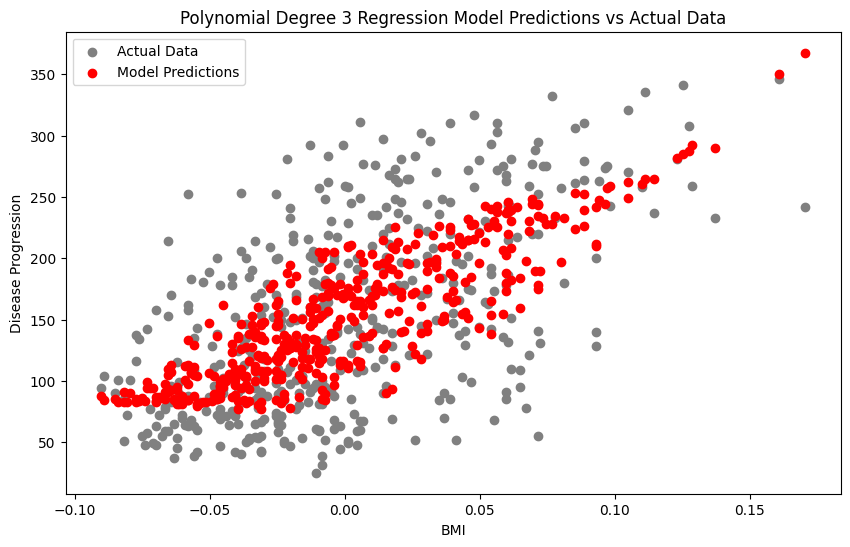

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on the training and test sets
y_train_pred = model_deg3.predict(X_train_selected)
y_test_pred = model_deg3.predict(X_test_selected)

# Combine train and test sets for plotting
X_combined = np.vstack((X_train[['bmi', 's5']], X_test[['bmi', 's5']]))
y_combined = np.hstack((y_train, y_test))
y_pred_combined = np.hstack((y_train_pred, y_test_pred))

# Sort the combined sets by BMI for plotting
sorted_indices = X_combined[:, 0].argsort()
X_combined_sorted = X_combined[sorted_indices]
y_combined_sorted = y_combined[sorted_indices]
y_pred_combined_sorted = y_pred_combined[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_combined_sorted[:, 0], y_combined_sorted, color='gray', label='Actual Data')
plt.scatter(X_combined_sorted[:, 0], y_pred_combined_sorted, color='red', label='Model Predictions')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Polynomial Degree 3 Regression Model Predictions vs Actual Data')
plt.legend()
plt.show()

After checking with different models, polynomial regression model with degree 3 is considered to be the best model as it have R-Squared value of 0.45. There is some MAE and MAPE also shown but compared to other models this model have the lowest variance.  


**Where the model fails** - The model will fail if high outliers which will effect the accuracy of the training the model. The model will also fail with the increase number of features, due to the creation of interaction terms and higher-degree terms.  


**Model Limitation** -  With more number of feature the model becomes more complex and less interpretable. Model is not suitable for large dataset as it will require more time and resources to perform such a task.